# End-to-end segmentation solution

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
datamart_rfmt = pd.read_csv('online_datamart_rfmt.csv')
datamart_rfmt.head()

,CustomerID,Recency,Frequency,MonetaryValue,Tenure
0,12747,3,25,948.70,362
1,12748,1,888,7046.16,365
2,12749,4,37,813.45,214
3,12820,4,17,268.02,327
4,12822,71,9,146.15,88


## Pre-process data

First step in the segmentation process is to pre-process the data. You will apply log transformation, and then normalize the data to prepare it for clustering.

We have loaded the dataset with RFMT values as datamart_rfmt. Also, the pandas library is loaded as pd, and numpy as np.

- Import StandardScaler, initialize it, ad store as scaler.
- Apply log transformation to the raw RFMT data.
- Initialize the scaler and fit it on the log-transformed data.
- Transform and store the scaled data as datamart_rfmt_normalized.

In [3]:
# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler()
scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

## Calculate and plot sum of squared errors
Now, you will calculate the sum of squared errors for different number of clusters ranging from 1 to 10.

You will use the normalized RFMT data that you created in the previous exercise, it is stored as datamart_rfmt_normalized. The KMeans module from scikit-learn is also imported. Also, we have initialized an empty dictionary to store sum of squared errors as sse = {}.

- Initialize KMeans with k clusters and random state 1 and fit KMeans on the normalized dataset.
- Assign sum of squared distances to k element of sse dictionary.
- Add the plot title "The Elbow Method", X-axis label "k", and Y-axis label "SSE".
- Plot SSE values for each k stored as keys in the dictionary.

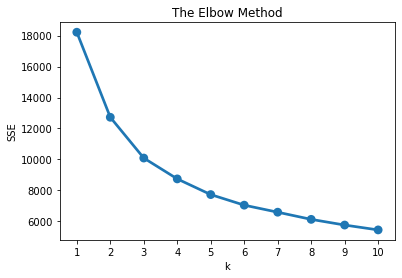

In [4]:
sse = {}
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## Build 4-cluster solution

Perfect, you can see the the recommended number of clusters is somewhere between 3 and 4. Now, you will build the latter number of clusters in this exercise.

The normalized RFMT dataset is available as datamart_rfmt_normalized, feel free to use the console to explore it.

- Import KMeans from sklearn library.
- Initialize KMeans with 4 clusters and random state 1.
- Fit k-means clustering on the normalized data set.
- Extract cluster labels and store them as cluster_labels object.

In [5]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

## Analyze the segments
Fantastic! Final step - analyzing your segmentation solution - you will analyze the average Recency, Frequency, MonetaryValue and Tenure values for each of the four segments you have built previously. Take some time to analyze them and understand what kind of customer groups and behaviors they represent.

The RFMT raw data is available as datamart_rfmt, and the cluster labels from the previous exercise is loaded as cluster_labels. We have also loaded the pandas library as pd.

- Create a new DataFrame by adding a cluster label column to datamart_rfmt.
- Create a groupby element on a Cluster column.
- Calculate average RFMT values and segment sizes per each Cluster value.

In [6]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          26.4      42.9         887.6  274.6  1188
1         168.6       6.2         104.9  227.7   920
2         140.1       7.6         151.1  216.5   879
3          30.1       7.5         101.8   40.1   656